<a href="https://colab.research.google.com/github/juanma1986/Analisis_Acciones/blob/main/ITC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt


In [ ]:
!pip install quantstats

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for quantstats: filename=QuantStats-0.0.47-py2.py3-none-any.whl size=40194 sha256=a63965ca9b515c46720a1a42e73efcc5e5bbc623f2ede1227bdc185568bb4f89
  Stored in directory: /root/.cache/pip/wheels/5b/cc/d0/28cf6147c640ed311e7451bde0597b0aab520885f16e9c26cd
Successfully built quantstats
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datasci

In [ ]:
tickers = ["aapl","amzn","baba","bac","bbd","bg","biox","brk.b","dis","fb","fcx","glob","googl","jpm","ko","mcd","meli","mrk","msft","nvda","ogzd","pbr","pfe","tm","tx","v","wmt","spy"]

import yfinance as yf


In [ ]:
ticker = yf.download(tickers)

[*********************100%***********************]  28 of 28 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- OGZD: No data found, symbol may be delisted


In [ ]:
ticker.drop(["Open","High","Volume","Low","Close"],inplace=True,axis=1)

In [ ]:
itc = ticker.pct_change()*100

In [ ]:
cartera

Adj Close                      ...                              
                AAPL      AMZN      BABA  ...        TX         V       WMT
Date                                      ...                              
1962-01-02       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-03       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-04       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-05       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-08       NaN       NaN       NaN  ...       NaN       NaN       NaN
...              ...       ...       ...  ...       ...       ...       ...
2022-01-07  0.098836 -0.428780  2.511254  ... -0.041409 -1.269622  0.954567
2022-01-10  0.011619 -0.657016 -1.163234  ... -3.893946 -2.299966 -0.193249
2022-01-11  1.678378  2.400209  3.031956  ... -0.452592  1.136955 -0.283524
2022-01-12  0.257024 -0.093737  3.948862  ...  4.026847  0.620395 -0.527042
2022-01-13 -1.079590 -1.893229 -3.471366  ... -2.705514  0.834448  0.969046

[15118 rows x 28 columns]

In [ ]:
cartera.std()

Adj Close  AAPL     2.839320
           AMZN     3.633925
           BABA     2.223027
           BAC      2.407440
           BBD      2.986507
           BG       2.151195
           BIOX     3.967009
           BRK.B         NaN
           DIS      1.984046
           FB       2.309303
           FCX      3.224329
           GLOB     2.787026
           GOOGL    1.902657
           JPM      2.259315
           KO       1.460014
           MCD      1.862414
           MELI     3.510817
           MRK      1.574910
           MSFT     2.130087
           NVDA     3.813698
           OGZD          NaN
           PBR      3.244483
           PFE      1.738538
           SPY      1.178749
           TM       1.838769
           TX       3.009104
           V        1.893525
           WMT      1.867391
dtype: float64

In [ ]:
cartera.mean()

Adj Close  AAPL     0.113082
           AMZN     0.184497
           BABA     0.045216
           BAC      0.056262
           BBD      0.084930
           BG       0.066028
           BIOX     0.120060
           BRK.B         NaN
           DIS      0.072009
           FB       0.115441
           FCX      0.079808
           GLOB     0.207029
           GOOGL    0.110003
           JPM      0.072677
           KO       0.057489
           MCD      0.073108
           MELI     0.164587
           MRK      0.058888
           MSFT     0.117488
           NVDA     0.186592
           OGZD          NaN
           PBR      0.076564
           PFE      0.060957
           SPY      0.046867
           TM       0.059448
           TX       0.073742
           V        0.098997
           WMT      0.083865
dtype: float64

In [ ]:
rendimientos = cartera.mean()
desvios = cartera.std()
tasaLibreRiesgo = 0.02 / 360

tablaRatios = pd.DataFrame(index=cartera.columns)
tablaRatios["sharperDiario"] = (rendimientos - tasaLibreRiesgo)/desvios
tablaRatios["sharperAnual"] = tablaRatios.sharperDiario * 250**0.5

tablaRatios

sharperDiario  sharperAnual
Adj Close AAPL        0.039808      0.629412
          AMZN        0.050755      0.802514
          BABA        0.020315      0.321209
          BAC         0.023347      0.369145
          BBD         0.028419      0.449347
          BG          0.030668      0.484898
          BIOX        0.030251      0.478304
          BRK.B            NaN           NaN
          DIS         0.036266      0.573414
          FB          0.049966      0.790025
          FCX         0.024735      0.391091
          GLOB        0.074263      1.174204
          GOOGL       0.057786      0.913677
          JPM         0.032143      0.508225
          KO          0.039337      0.621979
          MCD         0.039225      0.620194
          MELI        0.046864      0.740987
          MRK         0.037356      0.590654
          MSFT        0.055130      0.871685
          NVDA        0.048912      0.773369
          OGZD             NaN           NaN
          PBR         0.023581      0.372850
          PFE         0.035030      0.553877
          SPY         0.039713      0.627920
          TM          0.032300      0.510711
          TX          0.024488      0.387187
          V           0.052252      0.826182
          WMT         0.044880      0.709619

In [ ]:
cartera.cov().round(2)

Adj Close                     ...                        
                     AAPL   AMZN  BABA   BAC  ...    TM    TX     V   WMT
Adj Close AAPL       8.06   3.08  1.57  1.71  ...  1.01  2.03  1.82  1.28
          AMZN       3.08  13.21  1.76  2.44  ...  1.32  1.80  1.96  1.40
          BABA       1.57   1.76  4.94  1.29  ...  0.94  1.46  1.36  0.45
          BAC        1.71   2.44  1.29  5.80  ...  1.19  4.15  3.16  1.08
          BBD        2.23   2.34  1.77  3.86  ...  2.14  4.59  2.66  1.09
          BG         1.17   1.03  0.78  2.08  ...  1.03  2.76  1.59  0.59
          BIOX       1.20   1.05  0.73  1.12  ...  0.69  1.20  0.99  0.19
          BRK.B       NaN    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
          DIS        1.57   2.13  0.94  1.72  ...  0.99  2.21  1.83  1.04
          FB         1.65   1.98  1.75  1.27  ...  0.75  0.96  1.46  0.48
          FCX        1.91   2.02  2.73  2.96  ...  1.65  5.77  2.80  0.75
          GLOB       1.94   1.83  1.93  1.75  ...  0.99  1.65  1.95  0.72
          GOOGL      1.99   2.21  1.55  2.18  ...  1.16  1.95  1.86  0.72
          JPM        1.83   2.61  1.10  3.79  ...  1.17  3.13  2.64  1.27
          KO         0.99   0.79  0.45  1.06  ...  0.58  1.13  0.93  0.91
          MCD        1.09   1.08  0.68  1.14  ...  0.63  1.21  1.16  0.87
          MELI       2.95   3.34  2.49  3.97  ...  2.02  3.64  2.69  1.02
          MRK        1.03   1.04  0.59  1.14  ...  0.63  1.42  1.17  0.87
          MSFT       2.48   2.81  1.58  1.79  ...  1.03  1.90  1.73  1.29
          NVDA       3.88   4.00  2.46  2.82  ...  1.78  3.06  2.54  1.14
          OGZD        NaN    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
          PBR        2.23   2.23  2.06  3.57  ...  2.05  5.36  2.70  0.95
          PFE        1.07   1.23  0.51  1.26  ...  0.66  1.37  1.19  0.95
          SPY        1.52   1.95  1.10  2.03  ...  0.96  2.08  1.67  0.96
          TM         1.01   1.32  0.94  1.19  ...  3.38  1.92  1.39  0.60
          TX         2.03   1.80  1.46  4.15  ...  1.92  9.05  2.17  0.86
          V          1.82   1.96  1.36  3.16  ...  1.39  2.17  3.59  0.85
          WMT        1.28   1.40  0.45  1.08  ...  0.60  0.86  0.85  3.49

[28 rows x 28 columns]

In [ ]:
cartera.corr(method="pearson").round(2)

Adj Close                          ...                              
                     AAPL  AMZN  BABA   BAC   BBD  ...   SPY    TM    TX     V   WMT
Adj Close AAPL       1.00  0.31  0.39  0.25  0.35  ...  0.47  0.19  0.33  0.49  0.26
          AMZN       0.31  1.00  0.42  0.24  0.32  ...  0.43  0.21  0.25  0.45  0.24
          BABA       0.39  0.42  1.00  0.29  0.26  ...  0.45  0.33  0.25  0.38  0.15
          BAC        0.25  0.24  0.29  1.00  0.44  ...  0.64  0.27  0.43  0.50  0.24
          BBD        0.35  0.32  0.26  0.44  1.00  ...  0.62  0.46  0.50  0.45  0.29
          BG         0.25  0.18  0.18  0.34  0.38  ...  0.47  0.30  0.42  0.38  0.21
          BIOX       0.14  0.13  0.08  0.12  0.09  ...  0.17  0.13  0.11  0.14  0.03
          BRK.B       NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
          DIS        0.29  0.30  0.25  0.36  0.46  ...  0.63  0.28  0.42  0.54  0.28
          FB         0.40  0.46  0.40  0.28  0.22  ...  0.48  0.25  0.17  0.41  0.17
          FCX        0.22  0.17  0.33  0.33  0.51  ...  0.48  0.30  0.55  0.42  0.14
          GLOB       0.39  0.35  0.31  0.31  0.22  ...  0.51  0.28  0.23  0.44  0.20
          GOOGL      0.50  0.49  0.42  0.38  0.40  ...  0.62  0.39  0.35  0.54  0.30
          JPM        0.28  0.29  0.28  0.69  0.48  ...  0.71  0.28  0.42  0.55  0.33
          KO         0.24  0.15  0.17  0.29  0.40  ...  0.52  0.21  0.31  0.40  0.32
          MCD        0.25  0.19  0.23  0.29  0.35  ...  0.50  0.22  0.31  0.48  0.28
          MELI       0.42  0.41  0.39  0.34  0.39  ...  0.54  0.36  0.34  0.43  0.22
          MRK        0.22  0.17  0.19  0.29  0.33  ...  0.51  0.21  0.30  0.39  0.29
          MSFT       0.42  0.39  0.42  0.33  0.42  ...  0.66  0.27  0.36  0.51  0.36
          NVDA       0.39  0.31  0.39  0.26  0.34  ...  0.50  0.28  0.34  0.45  0.19
          OGZD        NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
          PBR        0.28  0.22  0.25  0.38  0.74  ...  0.55  0.39  0.52  0.41  0.21
          PFE        0.22  0.20  0.16  0.30  0.36  ...  0.54  0.21  0.31  0.42  0.29
          SPY        0.47  0.43  0.45  0.64  0.62  ...  1.00  0.48  0.56  0.69  0.50
          TM         0.19  0.21  0.33  0.27  0.46  ...  0.48  1.00  0.40  0.46  0.19
          TX         0.33  0.25  0.25  0.43  0.50  ...  0.56  0.40  1.00  0.37  0.22
          V          0.49  0.45  0.38  0.50  0.45  ...  0.69  0.46  0.37  1.00  0.35
          WMT        0.26  0.24  0.15  0.24  0.29  ...  0.50  0.19  0.22  0.35  1.00

[28 rows x 28 columns]

In [ ]:
df_activos =  cartera.loc[:, cartera.columns != '^spy']
df_activos

Adj Close                      ...                              
                AAPL      AMZN      BABA  ...        TX         V       WMT
Date                                      ...                              
1962-01-02       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-03       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-04       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-05       NaN       NaN       NaN  ...       NaN       NaN       NaN
1962-01-08       NaN       NaN       NaN  ...       NaN       NaN       NaN
...              ...       ...       ...  ...       ...       ...       ...
2022-01-06 -1.669334 -0.671094  4.514686  ...  0.562150 -0.113636 -0.277928
2022-01-07  0.098836 -0.428780  2.511254  ... -0.041409 -1.269622  0.954567
2022-01-10  0.011619 -0.657016 -1.163234  ... -3.893946 -2.299966 -0.193249
2022-01-11  1.678378  2.400209  3.031956  ... -0.452592  1.136955 -0.283524
2022-01-12  0.248456 -0.079519  3.641193  ...  3.614209  0.725344 -0.540915

[15117 rows x 28 columns]

In [ ]:
df_benchmark1 =  cartera.loc[:, cartera.columns == '^spy']

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data


In [ ]:
returns_data = True

In [ ]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429])

In [ ]:
cartera_cov = df_activos.cov()*252
cartera_cov

Adj Close               ...                        
                        AAPL         AMZN  ...           V         WMT
Adj Close AAPL   2031.557728   775.322373  ...  459.468720  321.801429
          AMZN    775.322373  3327.763081  ...  493.833400  351.898090
          BABA    395.526833   443.589302  ...  343.295944  112.785397
          BAC     431.957267   615.800677  ...  796.790387  272.705994
          BBD     561.247570   589.069492  ...  669.930136  275.565398
          BG      293.668653   260.595881  ...  401.724080  148.998061
          BIOX    301.184744   264.473333  ...  250.597332   48.216778
          BRK.B          NaN          NaN  ...         NaN         NaN
          DIS     395.254999   536.556766  ...  461.654152  262.194085
          FB      416.320740   497.734763  ...  366.802371  119.879324
          FCX     482.346840   508.191768  ...  704.673056  189.205963
          GLOB    488.058678   461.920967  ...  491.751423  181.375553
          GOOGL   500.925919   557.556739  ...  469.843490  182.508306
          JPM     462.237741   657.384125  ...  665.400411  319.004782
          KO      250.401666   198.129254  ...  234.470715  229.979255
          MCD     274.975032   273.197266  ...  291.975402  218.567938
          MELI    743.720636   842.394495  ...  678.982036  256.703314
          MRK     259.841910   262.718857  ...  293.913746  219.108995
          MSFT    623.848229   708.735008  ...  436.094284  323.974674
          NVDA    978.469530  1008.652743  ...  639.380948  287.286397
          OGZD           NaN          NaN  ...         NaN         NaN
          PBR     563.005401   560.912096  ...  680.223553  239.437466
          PFE     270.090250   311.109040  ...  300.839620  238.576780
          SPY     383.030048   491.909335  ...  420.821628  241.011852
          TM      255.280129   331.990817  ...  350.259779  151.276139
          TX      512.235975   454.827991  ...  547.636412  216.225613
          V       459.468720   493.833400  ...  903.530172  214.140428
          WMT     321.801429   351.898090  ...  214.140428  878.761614

[28 rows x 28 columns]

In [ ]:
varianza_portafolio = pesos.T @ cartera_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: nan%'

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 4.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data
from pulp import *

In [ ]:
import seaborn as sns

In [ ]:
returns = cartera.mean()*252
returns = pd.DataFrame(returns)
returns.columns = ["returns"]
returns["volatilidad"] = cartera.std() * np.sqrt(252)
returns

returns  volatilidad
Adj Close AAPL   28.467835    45.071000
          AMZN   46.408364    57.683642
          BABA   10.955758    35.308302
          BAC    14.186169    38.215466
          BBD    21.553031    47.405129
          BG     16.646145    34.145790
          BIOX   30.201686    62.936780
          BRK.B        NaN          NaN
          DIS    18.129854    31.494937
          FB     28.984517    36.653484
          FCX    20.130546    51.182582
          GLOB   51.612253    44.259786
          GOOGL  27.661037    30.201306
          JPM    18.333103    35.863967
          KO     14.500117    23.176356
          MCD    18.435253    29.563907
          MELI   41.288528    55.735899
          MRK    14.845099    25.000008
          MSFT   29.528042    33.815468
          NVDA   46.832109    60.542214
          OGZD         NaN          NaN
          PBR    19.440826    51.504449
          PFE    15.330434    27.598407
          SPY    11.790267    18.711234
          TM     15.038606    29.190550
          TX     18.434518    47.769200
          V      24.992792    30.054976
          WMT    21.152041    29.642984

In [ ]:
returns.idxmin()

returns        (Adj Close, BABA)
volatilidad     (Adj Close, SPY)
dtype: object

In [ ]:
returns.idxmax()

returns        (Adj Close, GLOB)
volatilidad    (Adj Close, BIOX)
dtype: object

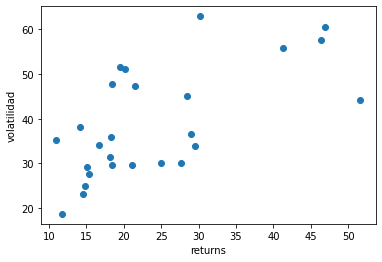

In [ ]:
plt.scatter(returns['returns'], returns['volatilidad'])
plt.xlabel('returns')
plt.ylabel('volatilidad');

In [ ]:
covarianza = cartera.cov()
varianza = cartera.var()
beta = covarianza / varianza
beta

Adj Close                      ...                              
                     AAPL      AMZN      BABA  ...        TX         V       WMT
Adj Close AAPL   1.000000  0.279651  0.176618  ...  0.212570  0.222176  0.314432
          AMZN   0.302097  1.000000  0.269272  ...  0.035861  0.550222  0.271697
          BABA   0.057358  0.080951  1.000000  ...  0.187402  0.183054  0.033697
          BAC    0.147384  0.138538  0.155469  ...  0.517739  0.603251  0.299368
          BBD    0.122265  0.084144  0.388461  ...  0.497818  0.581092  0.275212
          BG     0.009814 -0.015606  0.076430  ...  0.130311  0.244945  0.170724
          BIOX   0.179144  0.035388 -0.351730  ...  0.014972 -0.194253 -0.074951
          BRK.B       NaN       NaN       NaN  ...       NaN       NaN       NaN
          DIS    0.104425  0.125361  0.083111  ...  0.184238  0.287770  0.318096
          FB     0.175166  0.112213  0.354486  ...  0.089087  0.219595  0.146408
          FCX    0.102603  0.163210  0.476106  ...  0.633867  0.368173  0.227019
          GLOB   0.045323 -0.001423  0.224136  ...  0.115109  0.344525  0.093562
          GOOGL  0.087657  0.104147  0.262187  ...  0.244457  0.317122  0.119865
          JPM    0.127799  0.180561  0.090873  ...  0.283865  0.592654  0.341946
          KO     0.071261  0.064220  0.111945  ...  0.152577  0.171604  0.308015
          MCD    0.065276  0.107346 -0.007635  ...  0.066999  0.163539  0.288000
          MELI   0.123215  0.140711  0.530188  ...  0.300537  0.365328  0.231236
          MRK    0.073997  0.066051  0.087715  ...  0.166937  0.207079  0.335476
          MSFT   0.166629  0.158953  0.259242  ...  0.230586  0.344519  0.325196
          NVDA   0.333194  0.307230  0.505548  ...  0.332854  0.480790  0.208241
          OGZD        NaN       NaN       NaN  ...       NaN       NaN       NaN
          PBR    0.113654  0.100451  0.378235  ...  0.445542  0.391916  0.183549
          PFE    0.047974  0.047336 -0.045997  ...  0.180286  0.123864  0.329856
          SPY    0.115969  0.119244  0.159295  ...  0.214338  0.264985  0.295153
          TM     0.037425  0.036573  0.058728  ...  0.180755  0.318103  0.019721
          TX     0.123129  0.019229  0.334251  ...  1.000000  0.427706  0.167128
          V      0.070045  0.160578  0.177704  ...  0.232790  1.000000  0.194733
          WMT    0.081382  0.065096  0.026856  ...  0.074678  0.159869  1.000000

[28 rows x 28 columns]

In [ ]:
cartera.to_csv()

',Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close\n,AAPL,AMZN,BABA,BAC,BBD,BG,BIOX,BRK.B,DIS,FB,FCX,GLOB,GOOGL,JPM,KO,MCD,MELI,MRK,MSFT,NVDA,OGZD,PBR,PFE,SPY,TM,TX,V,WMT\nDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n1962-01-31,,,,,,,,,0.0,,,,,,4.0449178059979385,,,1.374067220356201,,,,,,,,,,\n1962-02-28,,,,,,,,,-0.9930683183038136,,,,,,-1.8719217947985478,,,1.1332146539552834,,,,,,,,,,\n1962-03-31,,,,,,,,,0.0,,,,,,-1.5542746853240974,,,0.2659175414461812,,,,,,,,,,\n1962-04-30,,,,,,,,,-3.8456448969190093,,,,,,-3.8962916184687724,,,0.29734963747269916,,,,,,,,,,\n1962-05-31,,,,,,,,,11.304223381511381,,,,,,4.024908204435662,,,1.8963984837990777,,,,,,,,,,\n1962-06-30,,,,,,,,,-1.836142604179991,,,,,,-0.9708366623098708,,,0.0,,,,,,,,,,\n1962-07-31,,,,,,,,,0.9166321693841795,,

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
itc.dropna(Nan)

NameError: ignored

In [ ]:
itc["aapl"].plot();

KeyError: ignored

In [ ]:
bono = np.npv(rate=9, values=[-2000000, 11249, 12653, 14233, 16010, 18009, 20259, 22788, 5152225])
bono

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


-1998732.48184995

In [ ]:
bono1 = np.irr([-2000000, 11249, 12653, 14233, 16010, 18009, 20259, 22788, 5152225])
bono1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


0.13048789245643833

In [ ]:
itc.describe()

Adj Close               ...                           
               AAPL         AMZN  ...            V           WMT
count  10365.000000  6210.000000  ...  3482.000000  12459.000000
mean       0.112878     0.184015  ...     0.098813      0.083949
std        2.839114     3.633493  ...     1.892988      1.867280
min      -51.869183   -24.766064  ...   -13.643484    -16.827160
25%       -1.300998    -1.296217  ...    -0.763630     -0.854095
50%        0.000000     0.043207  ...     0.119978      0.000000
75%        1.470795     1.467053  ...     0.951810      0.943819
max       33.228067    34.471367  ...    14.997357     15.598899

[8 rows x 28 columns]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


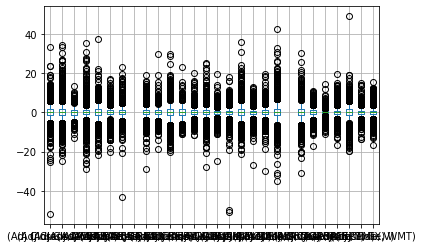

In [ ]:
itc.boxplot()

In [ ]:
import seaborn as sns

In [ ]:
itc.corr()

Adj Close                      ...                              
                     AAPL      AMZN      BABA  ...        TX         V       WMT
Adj Close AAPL   1.000000  0.311572  0.390340  ...  0.330535  0.490191  0.261447
          AMZN   0.311572  1.000000  0.419573  ...  0.250558  0.452594  0.241468
          BABA   0.390340  0.419573  1.000000  ...  0.253226  0.383984  0.149505
          BAC    0.246687  0.238031  0.286712  ...  0.434179  0.495723  0.240588
          BBD    0.351269  0.319783  0.260649  ...  0.503021  0.454987  0.285161
          BG     0.246754  0.175570  0.178793  ...  0.416117  0.382218  0.208808
          BIOX   0.143506  0.133456  0.074690  ...  0.111205  0.135949  0.035159
          BRK.B       NaN       NaN       NaN  ...       NaN       NaN       NaN
          DIS    0.289207  0.298956  0.254071  ...  0.420262  0.535692  0.282283
          FB     0.402121  0.456047  0.399258  ...  0.169844  0.413174  0.167051
          FCX    0.216374  0.168046  0.334163  ...  0.551576  0.417262  0.144921
          GLOB   0.386940  0.348581  0.313300  ...  0.230748  0.442083  0.193505
          GOOGL  0.499974  0.487640  0.423456  ...  0.353766  0.540483  0.303652
          JPM    0.284537  0.292794  0.279791  ...  0.421913  0.545279  0.325815
          KO     0.235950  0.154331  0.172814  ...  0.314877  0.398599  0.324657
          MCD    0.249208  0.194580  0.225534  ...  0.314114  0.475701  0.279249
          MELI   0.417205  0.411548  0.393350  ...  0.339309  0.426884  0.223914
          MRK    0.221842  0.166708  0.189874  ...  0.300667  0.387607  0.287128
          MSFT   0.420806  0.393064  0.423378  ...  0.362658  0.512209  0.359382
          NVDA   0.394341  0.312056  0.392896  ...  0.335961  0.448975  0.193209
          OGZD        NaN       NaN       NaN  ...       NaN       NaN       NaN
          PBR    0.281457  0.223319  0.245907  ...  0.517991  0.405575  0.210210
          PFE    0.221645  0.201028  0.164171  ...  0.313659  0.424180  0.291126
          SPY    0.467475  0.432480  0.450541  ...  0.556389  0.685837  0.502511
          TM     0.193278  0.210306  0.323513  ...  0.401545  0.454945  0.189965
          TX     0.330535  0.250558  0.253226  ...  1.000000  0.372847  0.223189
          V      0.490191  0.452594  0.383984  ...  0.372847  1.000000  0.349164
          WMT    0.261447  0.241468  0.149505  ...  0.223189  0.349164  1.000000

[28 rows x 28 columns]

In [ ]:
correlacion_matriz = itc.corr()

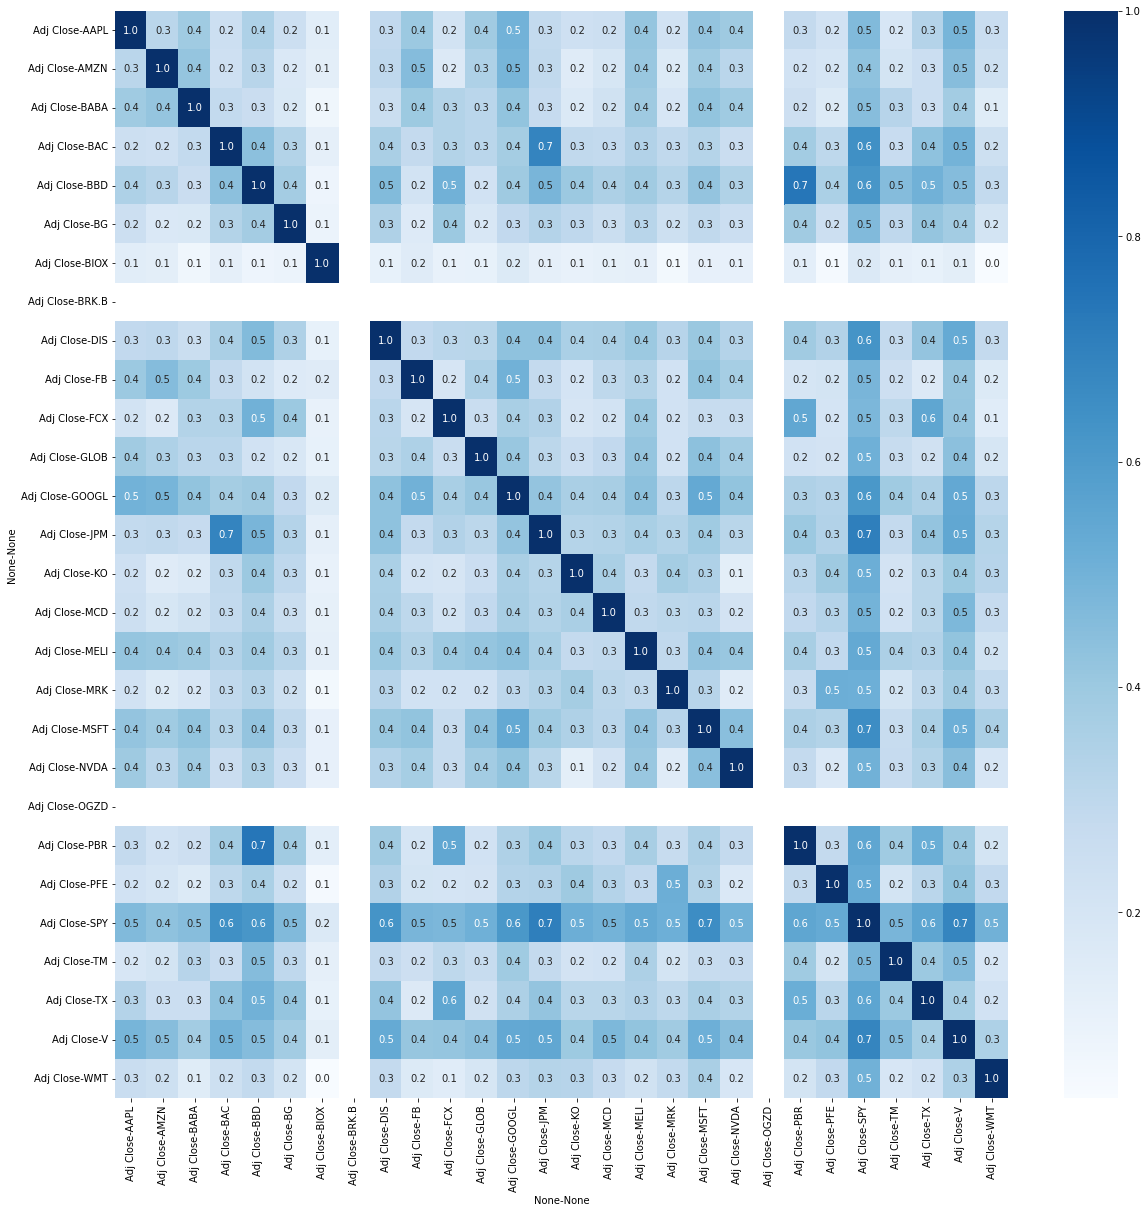

In [ ]:

plt.figure(figsize=(20,20)) 
sns.heatmap(correlacion_matriz, cbar=True, fmt='.1f', annot=True, cmap='Blues') 
plt.savefig('Mapa de calor de correlación')

In [ ]:
!install yfinance

install: missing destination file operand after 'yfinance'
Try 'install --help' for more information.


In [ ]:
import yfinance as yf
import pandas as pd
